<span style="color:#04c921; font-size:24px; font-weight:700"> Module 5 - Linear and Multiple Regression exercises</span>

Linear regression is one of the important modelling techniques. 
We looked into some of the important concepts like fitting a linear model, 
how variation in the data is explained by the model, error of the estimates and multiple regression. 

We will apply linear regression on a new dataset which is about concrete. 
The dataset source opinions, concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate. We will fit a simple linear model for the response variable concrete compressive strength and extend it to multiple predictors to analyze and evaluate any improvement in the model.

Reading the data:

In [3]:
concrete_data = read.csv("/dsa/data/all_datasets/concrete/Concrete_Data.csv",header=TRUE)
head(concrete_data)

,Cement..component.1..kg.in.a.m.3.mixture.,Blast.Furnace.Slag..component.2..kg.in.a.m.3.mixture.,Fly.Ash..component.3..kg.in.a.m.3.mixture.,Water...component.4..kg.in.a.m.3.mixture.,Superplasticizer..component.5..kg.in.a.m.3.mixture.,Coarse.Aggregate...component.6..kg.in.a.m.3.mixture.,Fine.Aggregate..component.7..kg.in.a.m.3.mixture.,Age..day.,Concrete.compressive.strength.MPa..megapascals..
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,540.0,0.0,0,162,2.5,1040.0,676.0,28,79.99
2,540.0,0.0,0,162,2.5,1055.0,676.0,28,61.89
3,332.5,142.5,0,228,0.0,932.0,594.0,270,40.27
4,332.5,142.5,0,228,0.0,932.0,594.0,365,41.05
5,198.6,132.4,0,192,0.0,978.4,825.5,360,44.30
6,266.0,114.0,0,228,0.0,932.0,670.0,90,47.03


The column headers are not very aesthetic or readable. 

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 1:</span> Modify the column names so that only the actual name of the column is used instead of all the unwanted description. 

The column names are present in a file called `headers.txt` in the same directory as the data. Read the data and extract the names into an array called headers.

In [42]:
# Your code for activity 1 goes here..
#require(plyr)
options(repr.plot.width = 16, repr.plot.height = 12)

dat <- read.table("/dsa/data/all_datasets/concrete/headers.txt", header = FALSE, sep = "-", dec = ".")

drop <- c("V2","V3","V4","V5","V6","V7")
dat <- dat[,!(names(dat) %in% drop)]
cols <- t(dat)
cols
#cols <- strsplit(cols, "\\(")
#ldply(cols)
cols <- gsub("\\s*\\([^\\)]+\\) ","",as.character(cols))
cols <- trimws(cols)
headers <- make.names(cols,unique = FALSE,allow_ = TRUE)
colnames(concrete_data) <- headers
head(concrete_data)


Cement (component 1),Blast Furnace Slag (component 2),Fly Ash (component 3),Water (component 4),Superplasticizer (component 5),Coarse Aggregate (component 6),Fine Aggregate (component 7),Age,Concrete compressive strength


,Cement,Blast.Furnace.Slag,Fly.Ash,Water,Superplasticizer,Coarse.Aggregate,Fine.Aggregate,Age,Concrete.compressive.strength
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,540.0,0.0,0,162,2.5,1040.0,676.0,28,79.99
2,540.0,0.0,0,162,2.5,1055.0,676.0,28,61.89
3,332.5,142.5,0,228,0.0,932.0,594.0,270,40.27
4,332.5,142.5,0,228,0.0,932.0,594.0,365,41.05
5,198.6,132.4,0,192,0.0,978.4,825.5,360,44.30
6,266.0,114.0,0,228,0.0,932.0,670.0,90,47.03


<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 2:</span> Use sample.split() function to split the data into training and testing sets. Put 70% of data in "train_data" dataframe and rest in "test_data" dataframe. Use the seed as 1000 to reproduce test results for evaluation. 

We will evaluate the predictive capability of our model on test dataset. 

In [36]:
library(caTools)
set.seed(1000) # set.seed() will help us to reproduce the results.

# Your code for activity 2 goes here..
split = sample.split(concrete_data$Concrete.compressive.strength, SplitRatio=0.7)

# Train data will have 70% of data
train_data  = subset(concrete_data, split==TRUE)

# Test data will have the rest 30% of data
test_data  = subset(concrete_data, split==FALSE)


Check the correlation of independent variables with dependent variable Concrete. 

,Cement,Blast.Furnace.Slag,Fly.Ash,Water,Superplasticizer,Coarse.Aggregate,Fine.Aggregate,Age,Concrete.compressive.strength
Cement,1.00000000,-0.27521591,-0.397467341,-0.08158675,0.09238617,-0.109348994,-0.22271785,0.08194602,0.4978319
Blast.Furnace.Slag,-0.27521591,1.00000000,-0.323579901,0.10725203,0.04327042,-0.283998612,-0.28160267,-0.04424602,0.1348293
Fly.Ash,-0.39746734,-0.32357990,1.000000000,-0.25698402,0.37750315,-0.009960828,0.07910849,-0.15437052,-0.1057549
Water,-0.08158675,0.10725203,-0.256984023,1.00000000,-0.65753291,-0.182293602,-0.45066117,0.27761822,-0.2896334
Superplasticizer,0.09238617,0.04327042,0.377503146,-0.65753291,1.00000000,-0.265999148,0.22269123,-0.19270003,0.3660788
Coarse.Aggregate,-0.10934899,-0.28399861,-0.009960828,-0.18229360,-0.26599915,1.000000000,-0.17848096,-0.00301588,-0.1649346
Fine.Aggregate,-0.22271785,-0.28160267,0.079108491,-0.45066117,0.22269123,-0.178480957,1.00000000,-0.15609470,-0.1672412
Age,0.08194602,-0.04424602,-0.154370516,0.27761822,-0.19270003,-0.003015880,-0.15609470,1.00000000,0.3288730
Concrete.compressive.strength,0.49783192,0.13482926,-0.105754916,-0.28963338,0.36607883,-0.164934614,-0.16724125,0.32887300,1.0000000


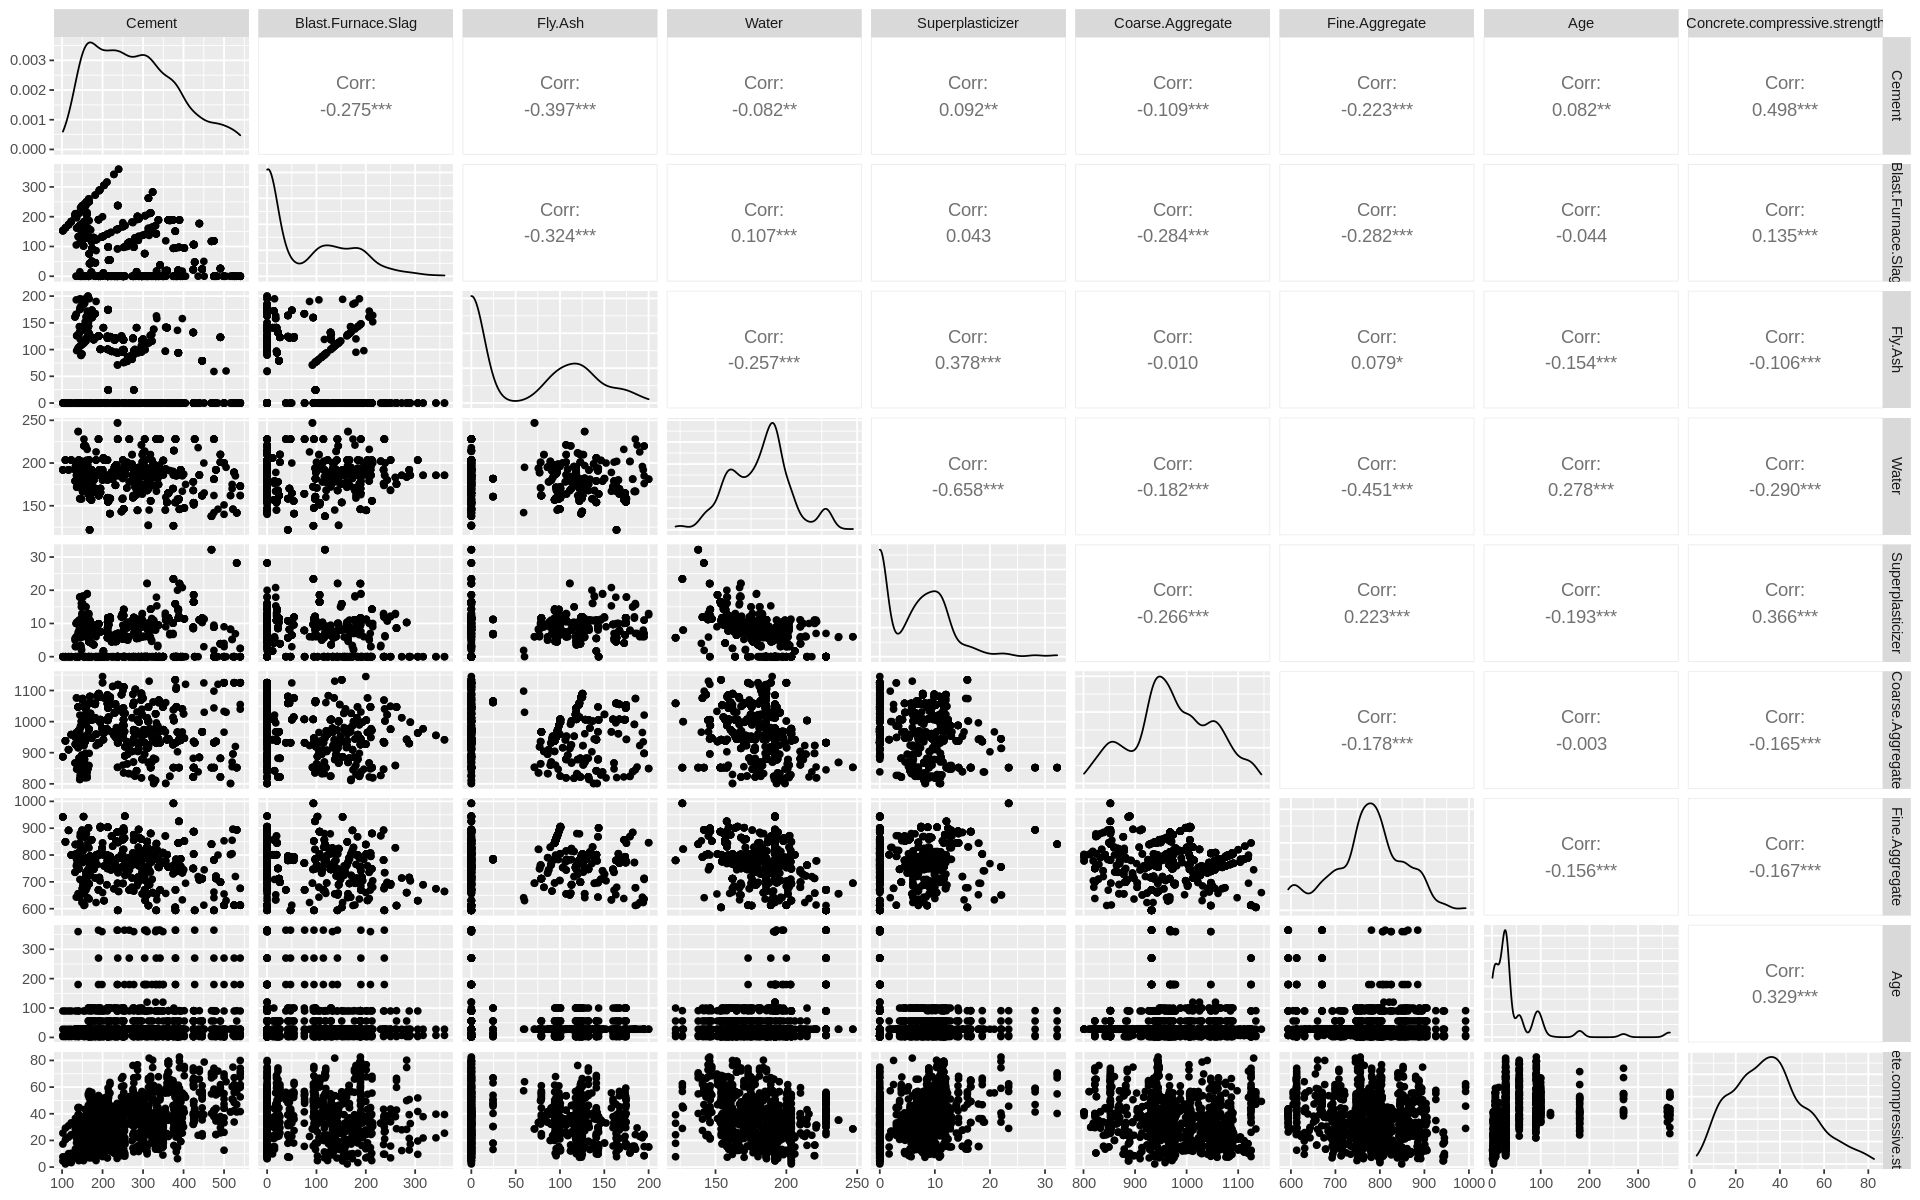

In [37]:
cor(concrete_data)

# or 

library(GGally)

ggpairs(concrete_data)

cement is highly correlated with concrete with a correlation of 0.51. 

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 3:</span> Fit a simple regression model to predict Concrete using Cement variable. Name this model `concrete_cement_reg`. Use train_data as data source.

In [39]:
# Your code for activity 3 goes here..
concrete_cement_reg <- lm(Concrete.compressive.strength ~ Cement, train_data)
summary(concrete_cement_reg)



Call:
lm(formula = Concrete.compressive.strength ~ Cement, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.978 -10.986  -0.686   9.625  43.169 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.080594   1.508800    8.67   <2e-16 ***
Cement       0.080955   0.005074   15.96   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.1 on 719 degrees of freedom
Multiple R-squared:  0.2615,	Adjusted R-squared:  0.2604 
F-statistic: 254.5 on 1 and 719 DF,  p-value: < 2.2e-16


<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 4:</span> Plot the regression line and residual errors for above model as shown in linear and multiple regression lab. 

`geom_smooth()` using formula 'y ~ x'



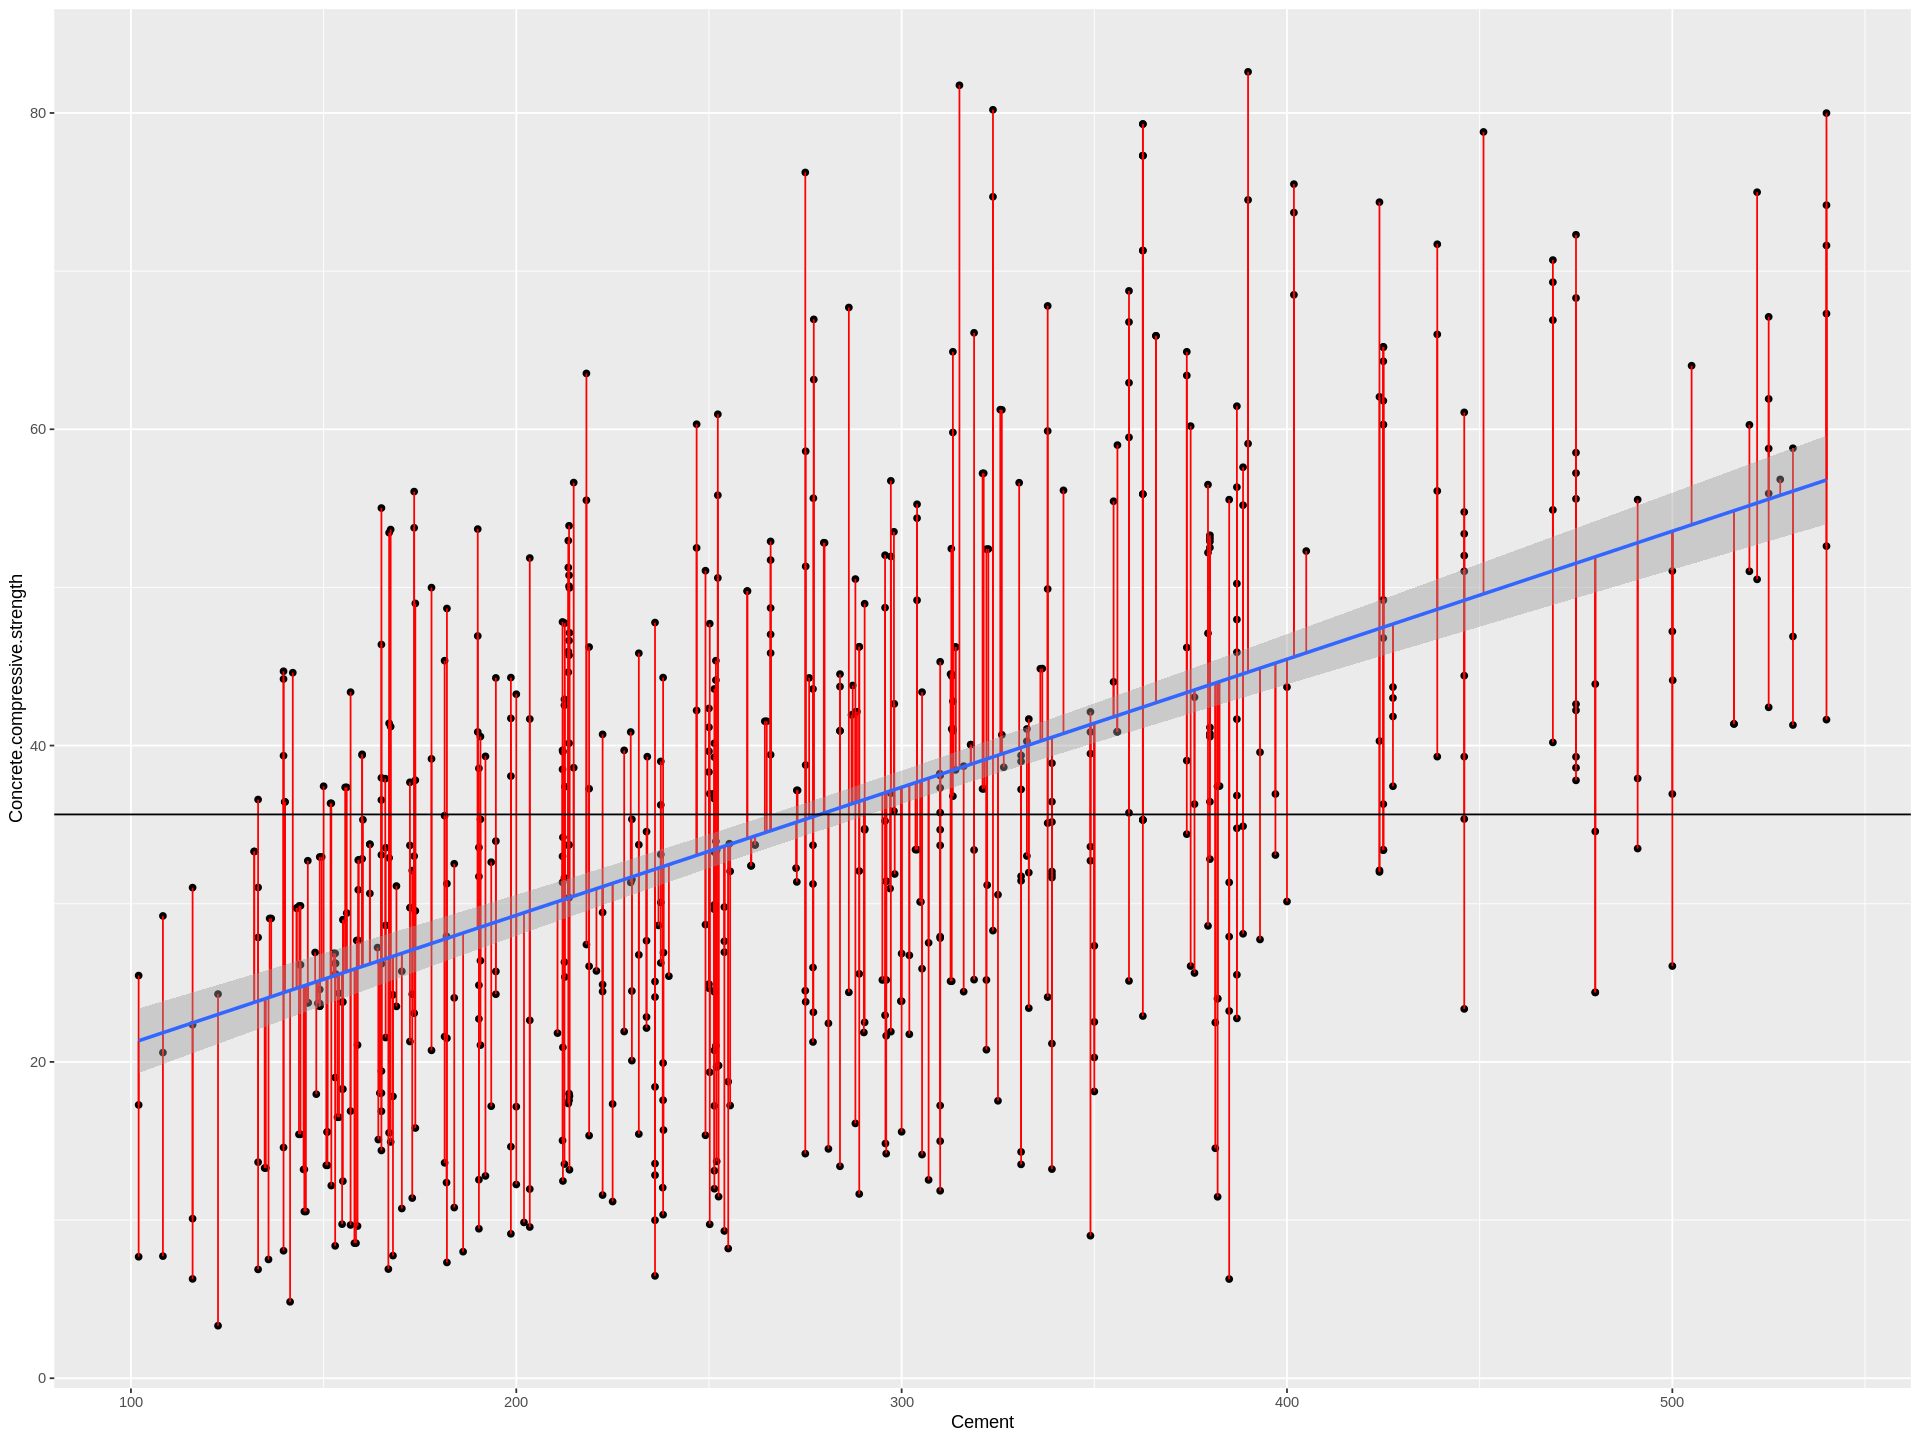

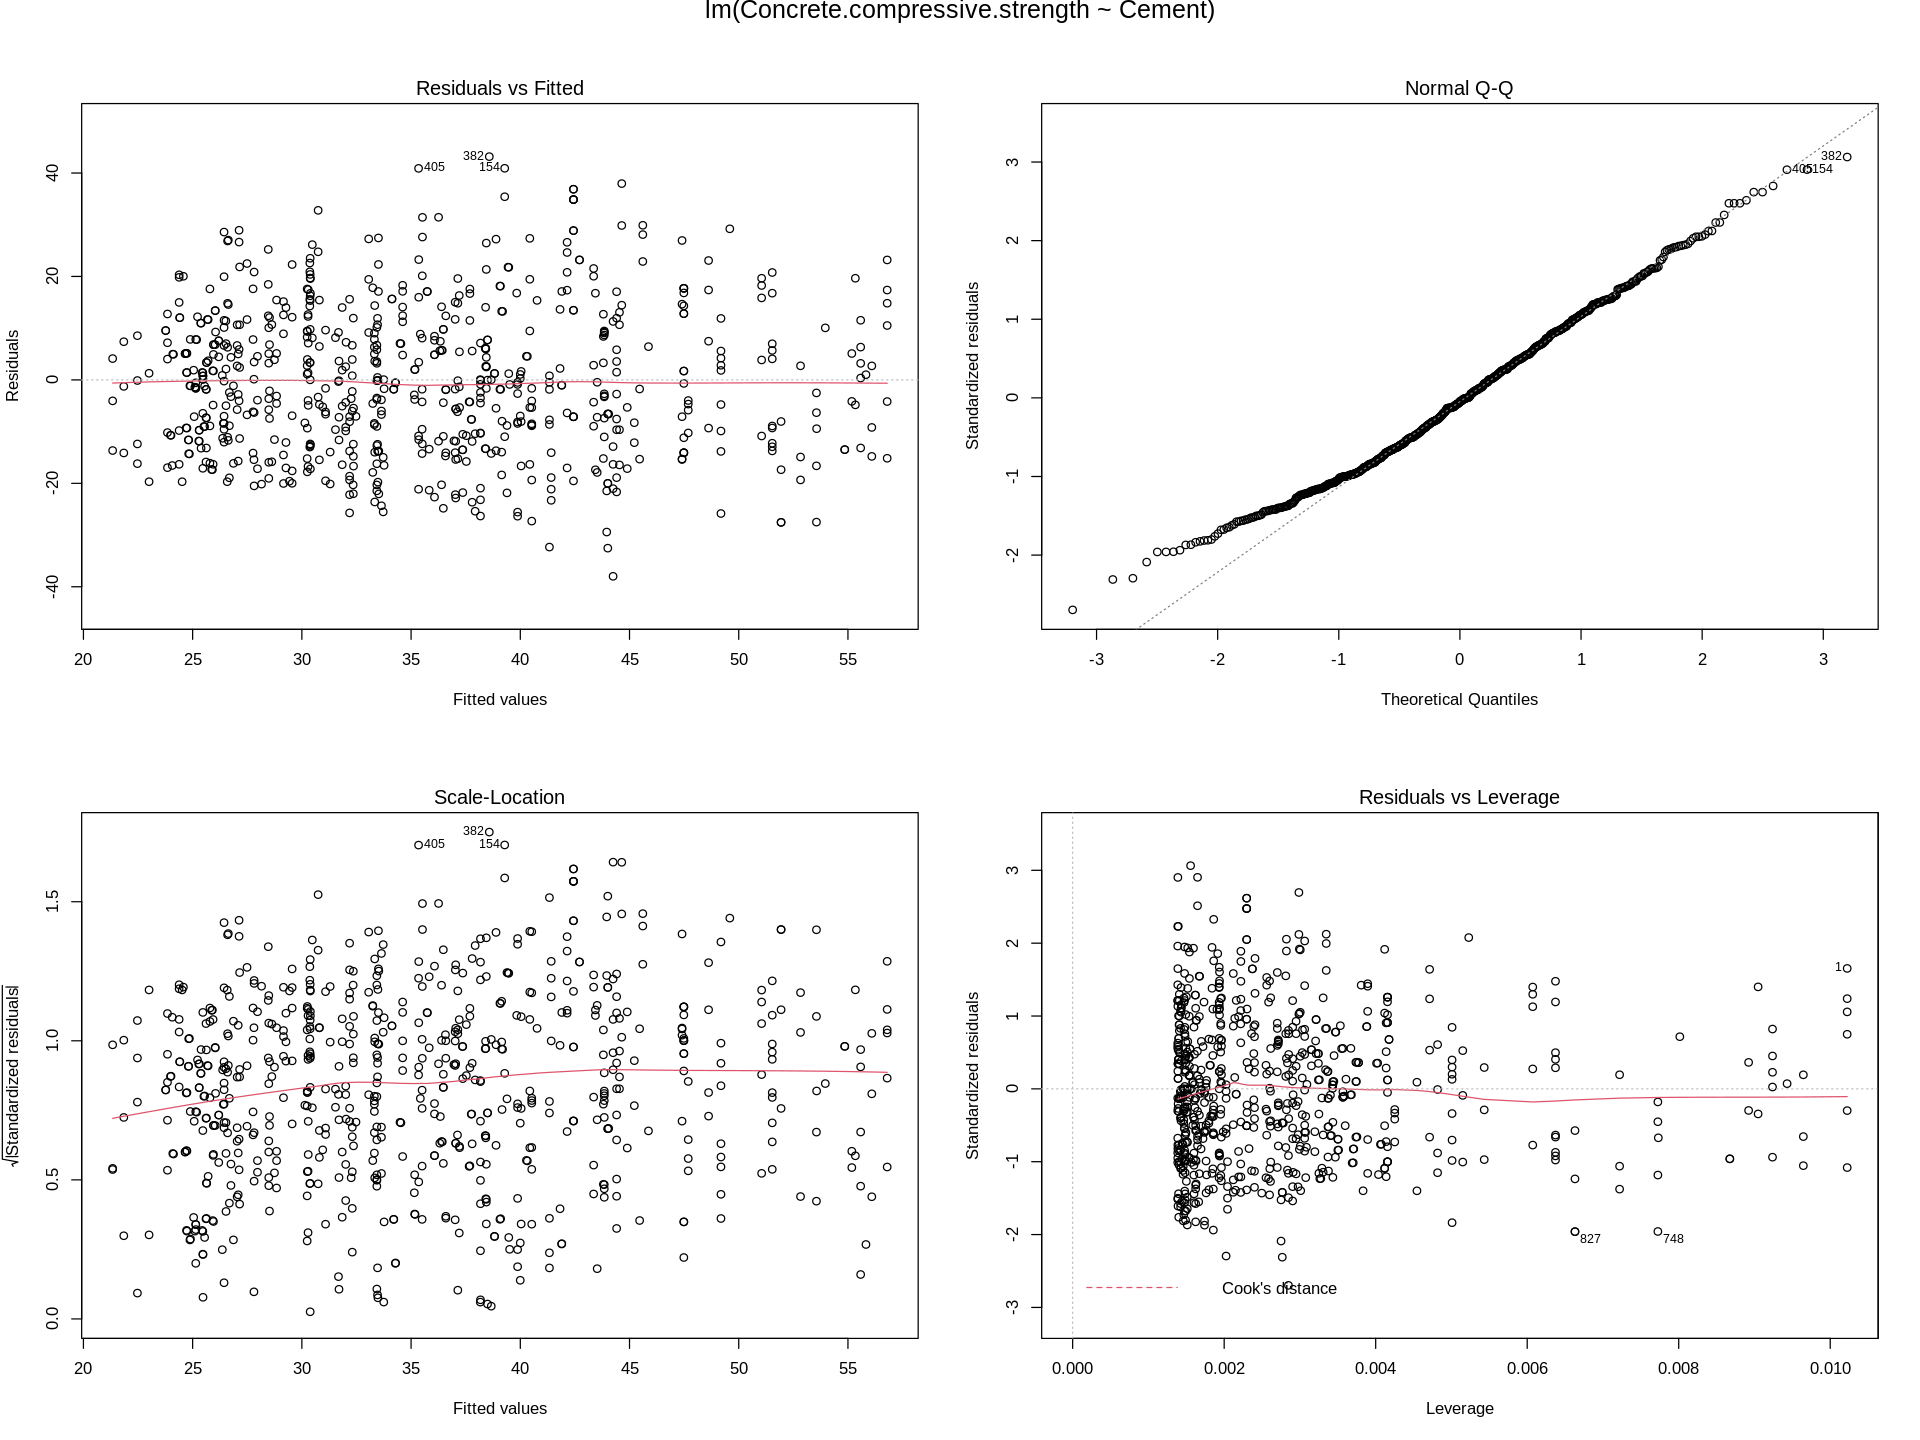

In [43]:
# Your code for activity 4 goes here..


library(ggplot2)

# The predicted values for dependent variable 'Concrete' can be accessed by referring to fitted.values of the model 
# as shown below.
pred_values<-concrete_cement_reg$fitted.values

#plot the regression line and residual errors
qplot(x=Cement, y=Concrete.compressive.strength, data=concrete_cement_reg)+
        geom_segment(aes(x=Cement, xend=Cement, y=Concrete.compressive.strength, 
                         yend=pred_values), color="red") + # Draw residuals, lines from each point to the regression line
        geom_smooth(method=lm) + 
        geom_hline(aes(yintercept=mean(Concrete.compressive.strength)))

par(mfrow = c(2,2), oma = c(0, 0, 1.1, 0))
plot(concrete_cement_reg)

According to the R-squared value the variable Cement can only explain 26% of the variation in the data. 

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 5:</span> Calculate Sum of squared errors of above model where SSE = Sum of squares of residual terms. You can access residuals by accessing model using following syntax: concrete_cement_reg$residuals.

In [44]:
# Your code for activity 5 goes here..
SSE = sum(concrete_cement_reg$residuals^2)
paste("SSE =",SSE)

[1] "SSE = 142961.306942572"

We have seen Cement was a significant variable in predicting Concrete strength. Its the most correlated variable with Concrete. So if we have to build the model with just one variable to predict Concrete strength, Cement would be the best predictor. Move on to multiple regression and add more variables to the mdoel. Add the next highly correlated variable to the model.

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 6:</span> Add Superplasticizer to the simple regression model fitted above and predict Concrete in train_data. Name this model `concrete_reg1`. Run summary(). 

In [45]:
# Your code for activity 6 goes here..
concrete_reg1 <- lm(Concrete.compressive.strength ~ Cement + Superplasticizer, train_data)
summary(concrete_reg1)



Call:
lm(formula = Concrete.compressive.strength ~ Cement + Superplasticizer, 
    data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.302 -10.158  -0.310   8.888  43.682 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      9.310078   1.470237   6.332 4.26e-10 ***
Cement           0.076006   0.004798  15.842  < 2e-16 ***
Superplasticizer 0.816350   0.083612   9.764  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.26 on 718 degrees of freedom
Multiple R-squared:  0.348,	Adjusted R-squared:  0.3462 
F-statistic: 191.6 on 2 and 718 DF,  p-value: < 2.2e-16


Superplasticizer has added value to the model. R-squared value increased from 0.25 to 0.35. Add next highly correlated variable Age to the model and call this model `concrete_reg2`.

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 7:</span> Add Age to `concrete_reg1` model fitted above to predict Concrete. Name this model `concrete_reg2`. Check for any improvement in the R-squared value. 

In [46]:
# Your code for activity 7 goes here..
concrete_reg2 <- lm(Concrete.compressive.strength ~ Cement + Superplasticizer + Age, train_data)
summary(concrete_reg2)




Call:
lm(formula = Concrete.compressive.strength ~ Cement + Superplasticizer + 
    Age, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.810  -7.861  -0.418   7.101  45.662 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.918025   1.349266   3.645 0.000287 ***
Cement           0.070970   0.004292  16.535  < 2e-16 ***
Superplasticizer 1.041002   0.076316  13.641  < 2e-16 ***
Age              0.095443   0.006983  13.667  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.82 on 717 degrees of freedom
Multiple R-squared:  0.4828,	Adjusted R-squared:  0.4806 
F-statistic: 223.1 on 3 and 717 DF,  p-value: < 2.2e-16


The model is getting better with addition of new predictors. The latest model concrete_reg2 can explain more variation in the data. If we keep on adding the data at some point there would be an insignificant increase in the model R-squared value. Its better to exclude variables to avoid over fitting of models. The variables Coarse, Fine, Fly don't contribute much to the model to the model built with  Cement+Superplasticizer+Age+Blast+Water as predictos. 

We had to check each variable if it was adding any new information to the model. This can become time consuming when there are few 10's of variables in the model. Instead you can reverse engineer and build a model using all the independent variables and start selecting the variables which are significant or exclude variables that are insignificant which ever works the best in a situation.  

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 8:</span> Fit a multiple regression model using all the independent variables in concrete_data dataset to predict Concrete. Name this model `concrete_reg3`.

In [48]:
# Your code for activity 8 goes here..
concrete_reg3 <- lm(Concrete.compressive.strength ~ Cement + Superplasticizer + Age + Water 
                    + Blast.Furnace.Slag + Fly.Ash + Coarse.Aggregate + Fine.Aggregate, train_data)

summary(concrete_reg3)


Call:
lm(formula = Concrete.compressive.strength ~ Cement + Superplasticizer + 
    Age + Water + Blast.Furnace.Slag + Fly.Ash + Coarse.Aggregate + 
    Fine.Aggregate, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.053  -6.049   0.573   6.469  35.667 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -29.526293  32.214828  -0.917   0.3597    
Cement               0.121542   0.010309  11.789  < 2e-16 ***
Superplasticizer     0.282243   0.110210   2.561   0.0106 *  
Age                  0.111706   0.006368  17.542  < 2e-16 ***
Water               -0.130040   0.049200  -2.643   0.0084 ** 
Blast.Furnace.Slag   0.098370   0.012217   8.052 3.43e-15 ***
Fly.Ash              0.087236   0.015213   5.734 1.45e-08 ***
Coarse.Aggregate     0.017989   0.011325   1.588   0.1126    
Fine.Aggregate       0.023600   0.012889   1.831   0.0675 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual stand

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 9:</span> According to the summary of the model `concrete_reg3` above remove the variables with p-value greater than 0.05 and from the model and rebuild the model with the rest variables. Name this model `concrete_reg4`.

In [53]:
# Your code for activity 9 goes here..
concrete_reg4 <- lm(Concrete.compressive.strength ~ Cement + Superplasticizer + Age + Water + Blast.Furnace.Slag + Fly.Ash, train_data)

summary(concrete_reg4)


Call:
lm(formula = Concrete.compressive.strength ~ Cement + Superplasticizer + 
    Age + Water + Blast.Furnace.Slag + Fly.Ash, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.134  -6.255   0.653   6.432  35.647 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        27.326967   5.116918   5.341 1.25e-07 ***
Cement              0.105275   0.005217  20.181  < 2e-16 ***
Superplasticizer    0.239313   0.100128   2.390   0.0171 *  
Age                 0.111282   0.006361  17.494  < 2e-16 ***
Water              -0.205056   0.025496  -8.043 3.66e-15 ***
Blast.Furnace.Slag  0.078978   0.006020  13.119  < 2e-16 ***
Fly.Ash             0.065353   0.009442   6.922 9.94e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.45 on 714 degrees of freedom
Multiple R-squared:  0.5972,	Adjusted R-squared:  0.5938 
F-statistic: 176.4 on 6 and 714 DF,  p-value: < 2.2e-16


The R-squared value of above model concrete_reg4 is 0.59. This is the best model you can get without applying any more advanced techniques. You came to this point in two steps doing reverse engineering eliminating variables from the model. Above approach of including predictors one by one and checking R-squared value will make build eight different models adding eight variables to model one by one. So this second approach is the better one. This may not be the case in all situations but its a better approach when your data has many predictors. 

# Save your notebook!